In [230]:
import sys
assert sys.version_info >= (3,5)

import sklearn 
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR ="."
CHAPTER_ID="dicision_trees"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
    print("그림저장: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [231]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# moons 데이터셋을 훈련 셋과 데스트 셋으로 나눕니다.
Xm, ym = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.2, random_state=42)

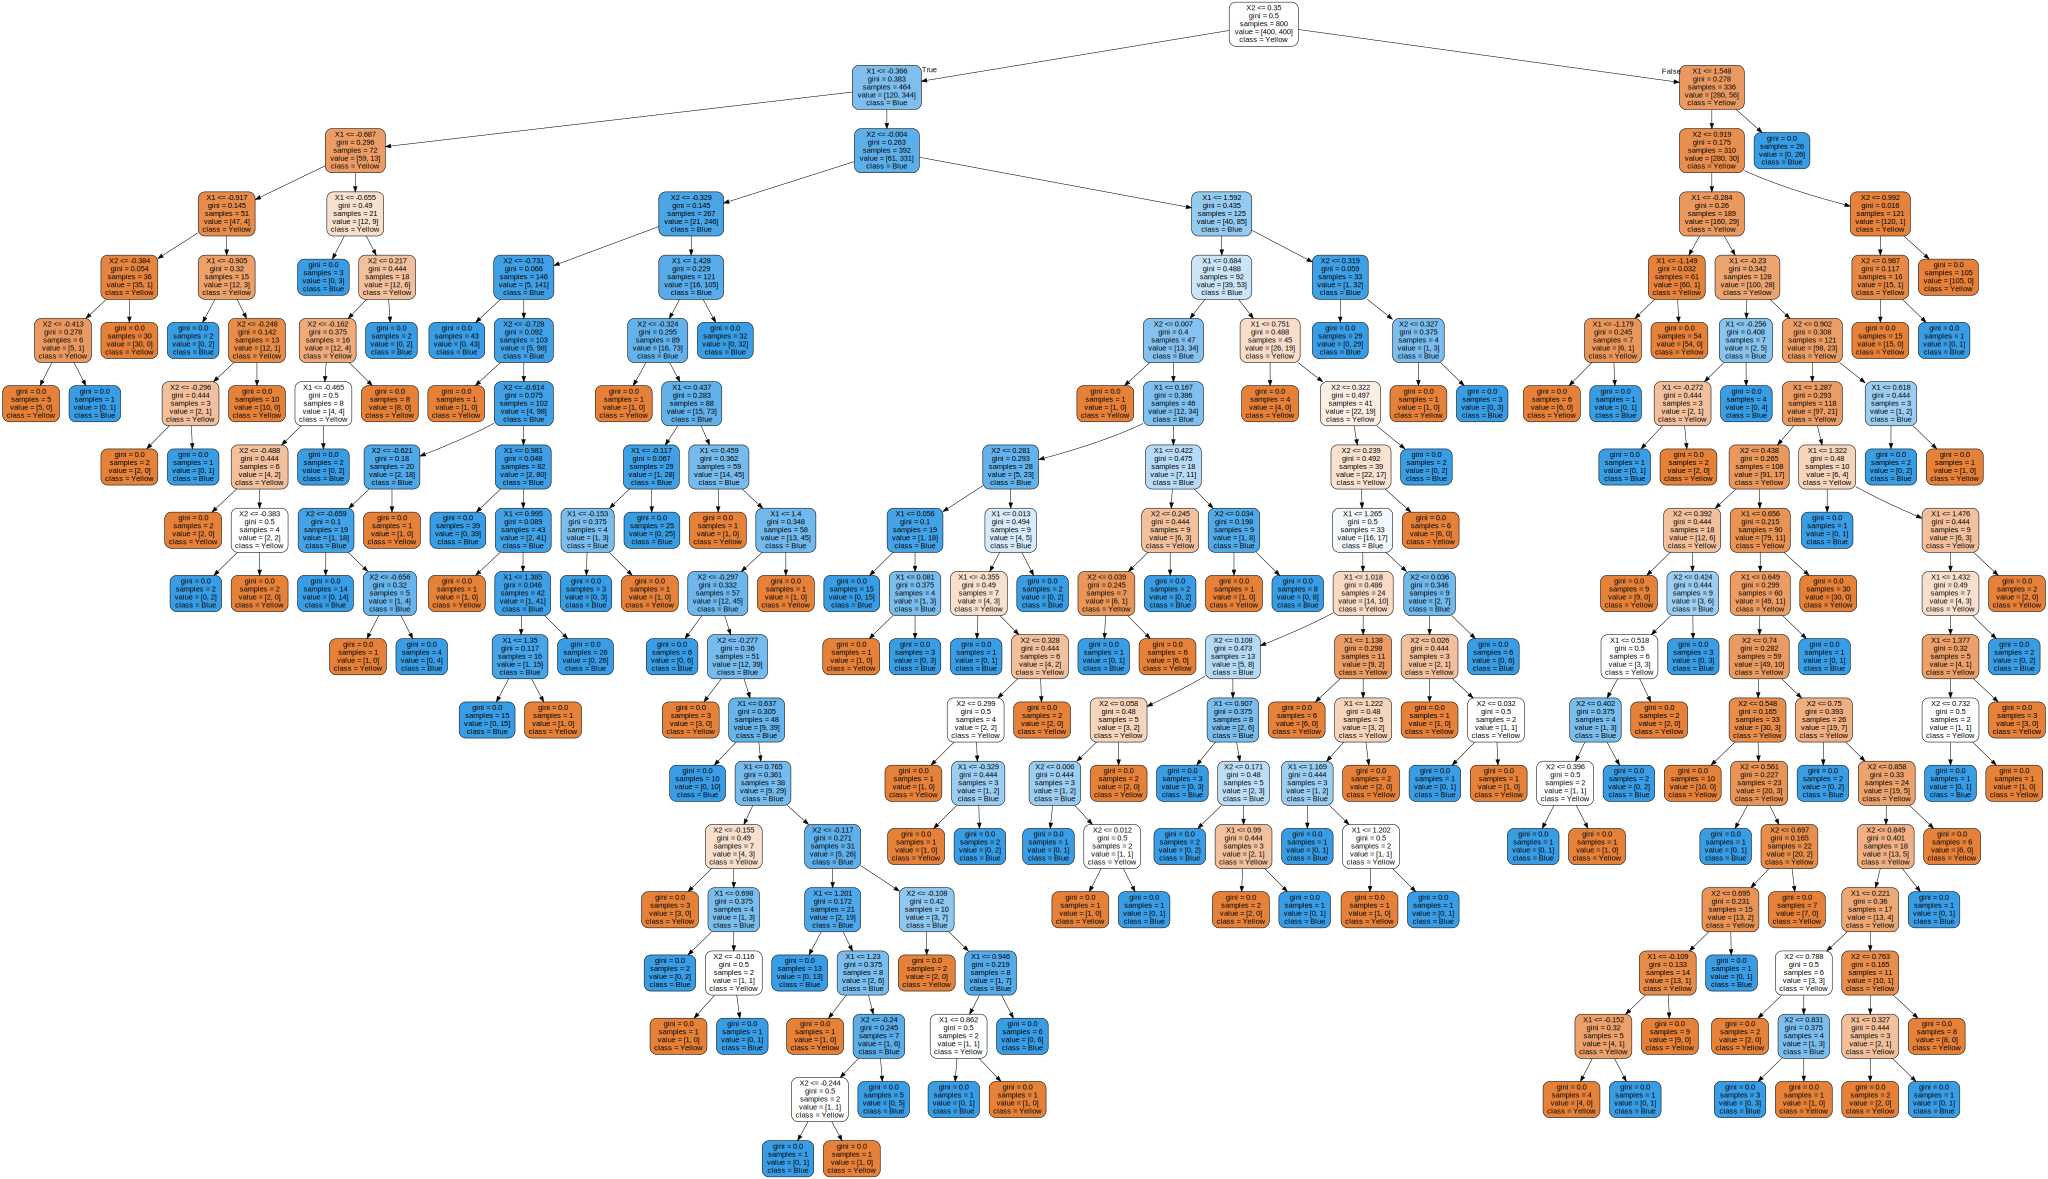

In [222]:
from graphviz import Source
from sklearn.tree import export_graphviz

# moons_clf1 - 규제가 없는 트리
moons_clf1 = DecisionTreeClassifier(random_state=42)
moons_clf1.fit(X_train, y_train)

# moons_clf1 - 결정트리 시각화
export_graphviz(
moons_clf1, 
out_file=os.path.join(IMAGES_PATH, "moons_tree.dot"),
feature_names=["X1", "X2"],
class_names = ["Yellow", "Blue"],
rounded=True,
filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "moons_tree.dot"))

In [233]:
# moons_clf1 - 예측하기
from sklearn.metrics import accuracy_score
y_pred = moons_clf1.predict(X_test)
accuracy_score(y_test, y_pred)

# moons_clf1 - 규제가 없는 트리의 정확도는 0.78입니다.

0.78

In [234]:
# moons_clf2 - 성능 향상을 위해 min_samples_leaf=10으로 조절한 결정트리 생성
moons_clf2 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
moons_clf2.fit(X_train, y_train)

# moons_clf2 - 예측하기
from sklearn.metrics import accuracy_score
y_pred = moons_clf2.predict(X_test)
accuracy_score(y_test, y_pred)
             
# moons_clf2 - min_samples_leaf 개수에 따른 정확도
# min_samples_leaf    accuracy_score
#   규제가 없을때        0.78
#        4               0.8
#        5               0.81
#        6               0.825
#        7               0.83
#        8               0.835
#        9               0.84
#       10               0.845
#       11               0.835
#       12               0.835
#       13               0.835
# min_samples_leaf가 10일때 정확도가 0.845으로 가장 높은 것을 확인할 수 있습니다.

0.845

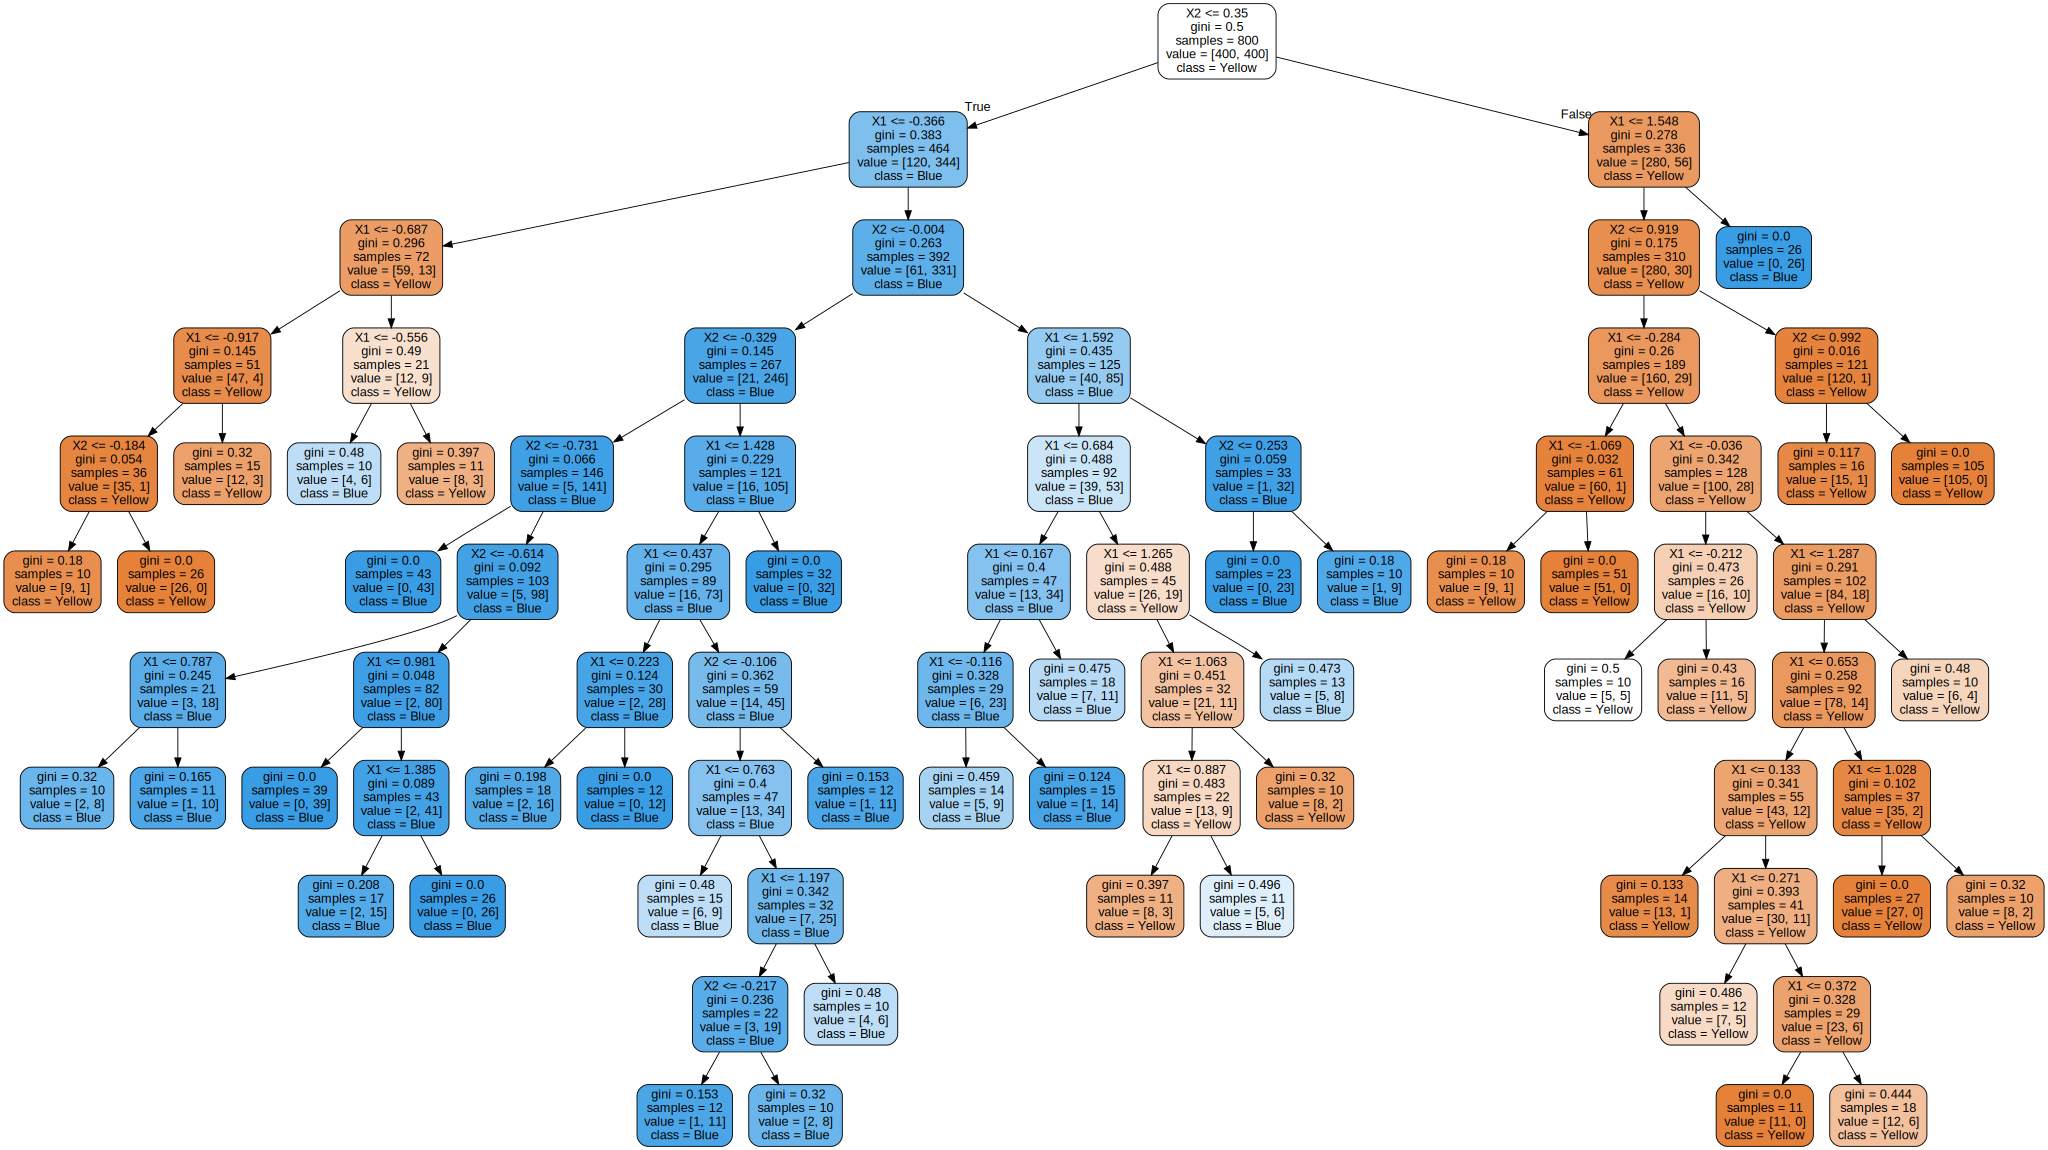

In [235]:
# moons_clf2  - min_samples_leaf=10인 최종트리 시각화
export_graphviz(
moons_clf2, 
out_file=os.path.join(IMAGES_PATH, "moons_tree2.dot"),
feature_names=["X1", "X2"],
class_names = ["Yellow", "Blue"],
rounded=True,
filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "moons_tree2.dot"))

In [236]:
from matplotlib.colors import ListedColormap

# 결정경계 그릴 함수
def plot_decision_boundary(clf, X, y, axes=[0, 4, 0, 2.5], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.3)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:,1][y==0], "yo", markersize=2,label="Yellow")
        plt.plot(X[:, 0][y==1], X[:,1][y==1], "bs", markersize=2, label="Blue")
        plt.axis(axes)
    if iris:
        plt.xlabel("X1", fontsize=14)
        plt.ylabel("X2", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)  

그림저장:  min_samples_leaf_plot


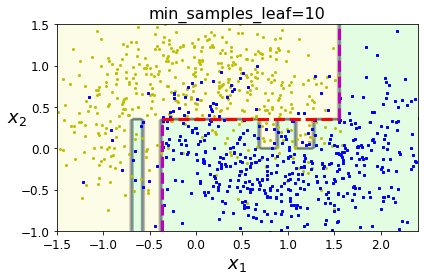

In [237]:
# moons_clf2 - 데이터 및 결정경계 시각화
plot_decision_boundary(moons_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf=10", fontsize=16)

# moons_clf2 - 결정경계 
plt.plot([-0.366, 1.548], [0.35, 0.35], "r--", linewidth=3) #depth0
plt.plot([1.548,1.548], [0.35, 1.5], "m--", linewidth=3) #depth1
plt.plot([-0.366,-0.366], [-1.0, 0.35], "m--", linewidth=3)  #depth1


save_fig("min_samples_leaf_plot")
plt.show()

In [238]:
#결정트리와 결정경계가 복잡하여 max_depth를 추가해보았습니다.

# moons_clf3 - min_samples_leaf=10과 max_depth=4로 조절힌 결정트리 생성
moons_clf3 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
moons_clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

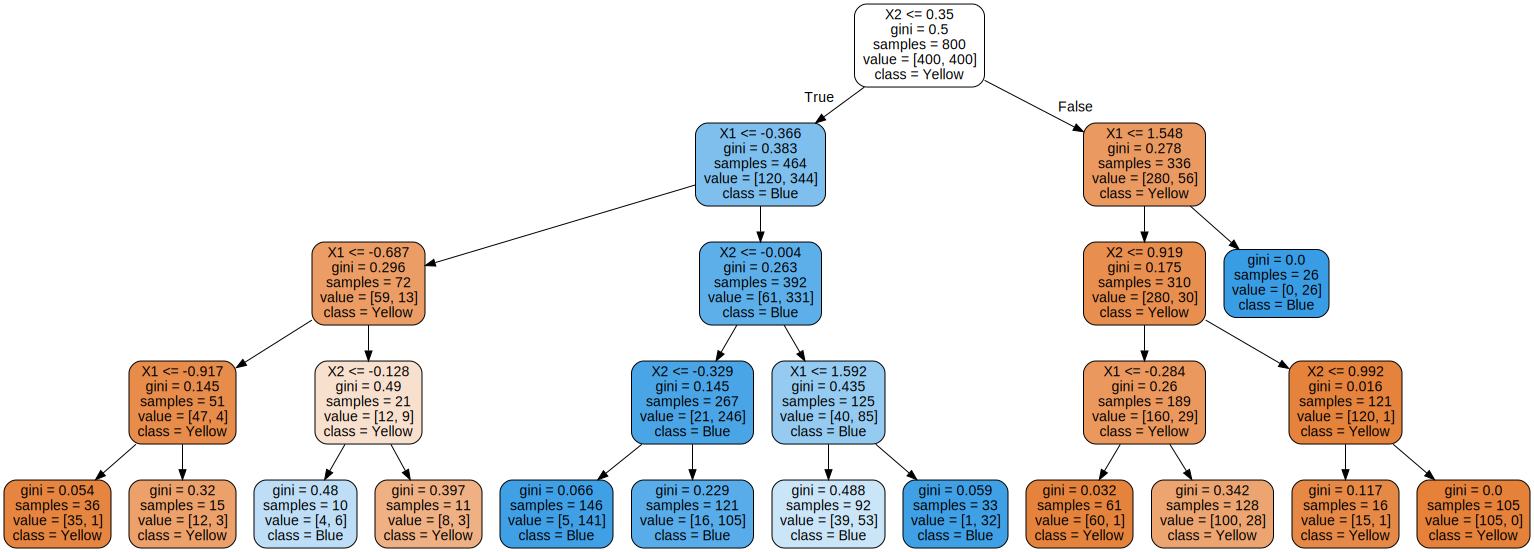

In [239]:
# moons_clf3  - 결정트리 시각화
export_graphviz(
moons_clf3, 
out_file=os.path.join(IMAGES_PATH, "moons_tree2.dot"),
feature_names=["X1", "X2"],
class_names = ["Yellow", "Blue"],
rounded=True,
filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "moons_tree2.dot"))

그림저장:  min_samples_leaf_plot2


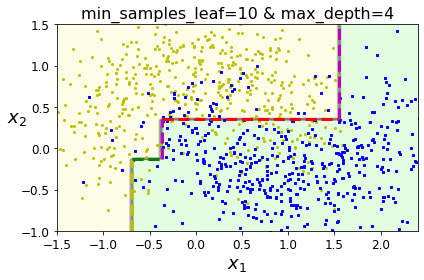

In [240]:
# moons_clf3 - 데이터 및 결정경계 시각화
plot_decision_boundary(moons_clf3, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf=10 & max_depth=4", fontsize=16)

# moons_clf3 - 결정경계 
plt.plot([-0.366, 1.548], [0.35, 0.35], "r--", linewidth=3) #depth0
plt.plot([1.548,1.548], [0.35, 1.5], "m--", linewidth=3) #depth1
plt.plot([-0.366,-0.366], [-0.128, 0.35], "m--", linewidth=3)  #depth1
plt.plot([-0.687,-0.687], [-1.0, -0.128], "y--", linewidth=3)  #depth2
plt.plot([-0.687, -0.366], [-0.128, -0.128], "g--", linewidth=3)  #depth3

save_fig("min_samples_leaf_plot2")
plt.show()